In [1]:
### Importing Necessery Libraries and Modules..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
### Let's load Hand Written Digits Dataset from keras library..
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_train[0].shape

(28, 28)

In [7]:
y_train[0]

5

> 
- There are 60k samples in the training dataset and 10k in test dataset..
- Each datapoint is a 2D array.

5

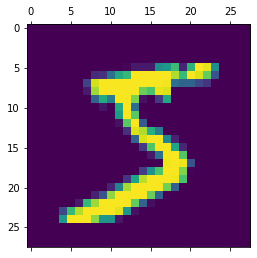

In [8]:
###Let's check the first Image..
plt.matshow(X_train[0])
y_train[0]

### We need to convert(flattening) each datapoints into a single dimension array from the 2D array before we pass it to Neural Network's input layer..

> *** Before training our model we should always try to scale down our Data..***

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train.reshape(X_train.shape[0],28*28)
X_test.reshape(X_test.shape[0],28*28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_train.reshape(X_train.shape[0],28*28).shape
X_test.reshape(X_test.shape[0],28*28).shape

(10000, 784)

In [12]:
X_train_flattened=X_train.reshape(X_train.shape[0],28*28)
X_test_flattened=X_test.reshape(X_test.shape[0],28*28)

### Model Building..

In [13]:
model=keras.Sequential([
    keras.layers.Dense(units=10,input_shape=(28*28,),activation='sigmoid')])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 722us/step - loss: 0.4701 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 1s 684us/step - loss: 0.3045 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 1s 658us/step - loss: 0.2831 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 608us/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 601us/step - loss: 0.2670 - accuracy: 0.9254


### Evaluating our model's performance..

In [19]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 524us/step - loss: 0.2673 - accuracy: 0.9248


[0.26727479696273804, 0.9247999787330627]

In [21]:
pred=model.predict(X_test_flattened)

In [22]:
pred[0]###As there are 10 output neurons that is why it is giving 10 outputs..
###and we will consider that output which has the highest value and we will taket the position of it..

array([3.7714154e-02, 3.8859324e-07, 6.1674684e-02, 9.6702981e-01,
       3.0465126e-03, 1.1721885e-01, 2.3698715e-06, 9.9981695e-01,
       1.0105720e-01, 6.5898240e-01], dtype=float32)

In [23]:
np.argmax(pred[0])

7

In [24]:
y_test[0]

7

### Let's build a Confusion Matrix..

In [25]:
final_pred=[np.argmax(i) for i in pred]

In [27]:
final_pred[:5]

[7, 2, 1, 0, 4]

In [28]:
tf.math.confusion_matrix(labels=y_test,predictions=final_pred)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   7,   10,  919,   19,    8,    4,   13,   10,   36,    6],
       [   2,    0,   17,  927,    1,   20,    3,    9,   21,   10],
       [   1,    1,    2,    2,  914,    0,   12,    4,    6,   40],
       [   9,    3,    2,   40,   12,  761,   18,    7,   33,    7],
       [  10,    3,    4,    1,    7,    9,  919,    2,    3,    0],
       [   1,    5,   22,    7,    9,    0,    0,  946,    2,   36],
       [   7,   10,    6,   27,   10,   20,   10,   12,  861,   11],
       [  11,    6,    1,   12,   24,    5,    0,   19,    5,  926]])>

Text(87.0, 0.5, 'True_Value')

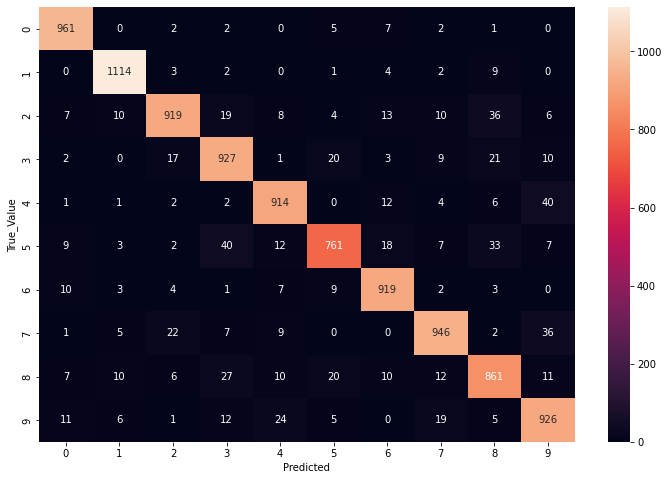

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=final_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True_Value')

### Let's try to improve the model's performance by adding Hidden Layer..

In [34]:
model_1=keras.Sequential([
    keras.layers.Dense(units=100,input_shape=(28*28,),activation='relu'),
    keras.layers.Dense(units=10,activation='sigmoid')])

model_1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model_1.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 947us/step - loss: 0.2728 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1239 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0877 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0660 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 2s 951us/step - loss: 0.0531 - accuracy: 0.9833


In [35]:
model_1.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 617us/step - loss: 0.0809 - accuracy: 0.9768


[0.08085164427757263, 0.9768000245094299]

Text(87.0, 0.5, 'True_Value')

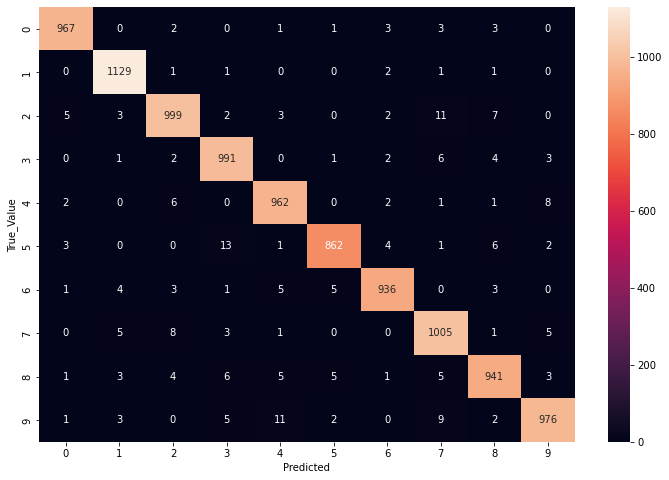

In [36]:
pred_1=model_1.predict(X_test_flattened)
final_pred_1=[np.argmax(i) for i in pred_1]
plt.figure(figsize=(12,8))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=final_pred_1),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True_Value')

### Instead of flattening our training and testing data we can use keras inbuild flatten function..It will automatically flatten the 2D arrays..

In [ ]:
model_2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28*28,),)
    keras.layers.Dense(units=100,activation='relu'),
    keras.layers.Dense(units=10,activation='sigmoid')])

model_2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model_2.fit(X_train_flattened,y_train,epochs=5)